# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Osher 4814
# student 2: Alon 4694

## Part 2 - Initial Preparations
You could add as many code cells as needed

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Load data from CSV
train_data = pd.read_csv('wine_train.csv')
test_data = pd.read_csv('wine_test.csv')

In [3]:
# Display first 5 columns of train data
train_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [4]:
# Display first 5 columns of test data
test_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [5]:
# Show the corr of test data
test_data.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,-0.006626,-0.009440,-0.266216,0.162404,0.372485,0.206871,-0.390548,0.133561,0.569408,-0.254511,0.099016,0.561272,-0.283932
malic_acid,-0.006626,1.000000,0.041595,0.301608,-0.271036,-0.378490,-0.484559,0.277575,-0.357897,0.240793,-0.598088,-0.510999,-0.358937,0.593195
ash,-0.009440,0.041595,1.000000,0.537590,-0.053404,-0.030278,-0.113330,0.334431,-0.218353,0.218495,-0.106514,-0.164687,-0.034808,0.220407
alcalinity_of_ash,-0.266216,0.301608,0.537590,1.000000,-0.321763,-0.343779,-0.436390,0.527549,-0.183354,0.135088,-0.330198,-0.335409,-0.539902,0.576199
magnesium,0.162404,-0.271036,-0.053404,-0.321763,1.000000,0.235138,0.237704,-0.329042,0.491156,0.077021,0.147365,0.100646,0.420903,-0.188566
total_phenols,0.372485,-0.378490,-0.030278,-0.343779,0.235138,1.000000,0.839984,-0.592684,0.644847,0.001137,0.416623,0.612658,0.561005,-0.691855
flavanoids,0.206871,-0.484559,-0.113330,-0.436390,0.237704,0.839984,1.000000,-0.629779,0.630279,-0.306732,0.602698,0.805445,0.532763,-0.886365
nonflavanoid_phenols,-0.390548,0.277575,0.334431,0.527549,-0.329042,-0.592684,-0.629779,1.000000,-0.468201,0.055991,-0.194452,-0.583933,-0.687098,0.630578
proanthocyanins,0.133561,-0.357897,-0.218353,-0.183354,0.491156,0.644847,0.630279,-0.468201,1.000000,-0.025266,0.316147,0.496214,0.284267,-0.400272
color_intensity,0.569408,0.240793,0.218495,0.135088,0.077021,0.001137,-0.306732,0.055991,-0.025266,1.000000,-0.619902,-0.470412,0.199383,0.362468


In [6]:
# Shows statistical summary of all columns of train data

train_data.describe(include='all')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


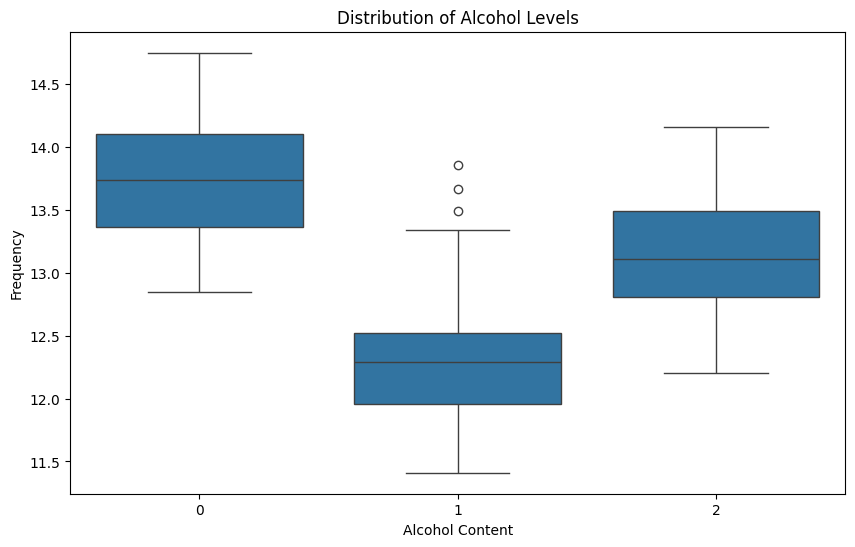

In [7]:
# Shows the distribution of alcohol levels

plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='alcohol', data=train_data)
plt.title('Distribution of Alcohol Levels')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()

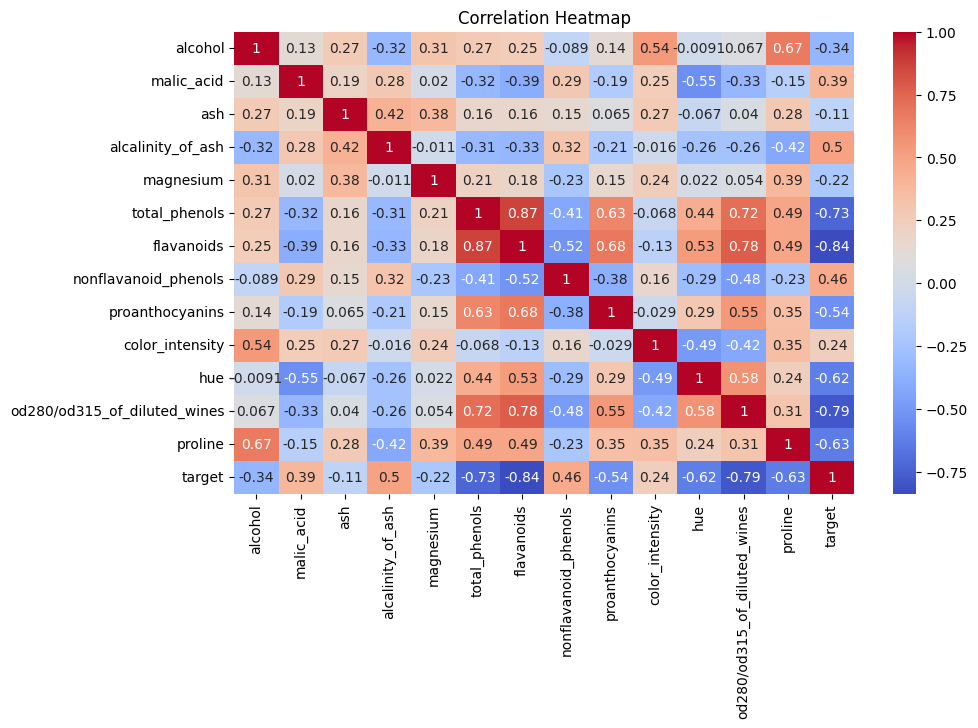

In [8]:
# Shows the correlation heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [9]:
# Split the dataset into features and target variable.
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

In [10]:
# Set up scaler to normalize the feautres.
scaler = StandardScaler()
# Set up PCA to reduce dimensions of the data to 7.
pca = PCA(n_components=7)
# Define scorer for F1-macro score
scoring = make_scorer(f1_score, average='macro')

# Create SVC model pipeline with scaler and pca.
pipeline_svc = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('model', SVC())
])

# Set up the hyperparameter grid to tune our model
param_grid_svc = {
    'model__C': [0.5, 1, 7],
    'model__kernel': ['linear', 'rbf']
}

# Cross-validation
grid_search_svc = GridSearchCV(
    estimator=pipeline_svc,
    param_grid=param_grid_svc,
    cv=5,
    scoring=scoring
)

# Apply the train data with SVC model pipeline and cross validation.
grid_search_svc.fit(X_train, y_train)

print("Best parameters for SVC:", grid_search_svc.best_params_)
print(f"Best cross-validation score for SVC: {grid_search_svc.best_score_:.4f}")

Best parameters for SVC: {'model__C': 1, 'model__kernel': 'rbf'}
Best cross-validation score for SVC: 0.9641


In [11]:
# Create RandomForest model pipeline with scaler and pca.
pipeline_rf = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('model', RandomForestClassifier())
])

# Set up the hyperparameter grid to tune our model
param_grid_rf = {
    'model__n_estimators': [50, 100 , 150],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

# Cross-validation
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring=scoring
)

# Apply the train data with Random Forest model pipeline and cross validation.
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print(f"Best cross-validation score for Random Forest: {grid_search_rf.best_score_:.4f}")

Best parameters for Random Forest: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 100}
Best cross-validation score for Random Forest: 0.9655


In [12]:
# Create KNN model pipeline with scaler and pca.

pipeline_knn = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('model', KNeighborsClassifier())
])

# Set up the hyperparameter grid to tune our model
param_grid_knn = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2] # 1 is Manhattan distance, 2 is Euclidean distance.
}

# Cross-validation
grid_search_knn = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_grid_knn,
    cv=5,
    scoring=scoring
)

# Apply the train data with KNN model pipeline and cross validation.
grid_search_knn.fit(X_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)
print(f"Best cross-validation score for KNN: {grid_search_knn.best_score_:.4f}")


Best parameters for KNN: {'model__n_neighbors': 7, 'model__p': 2, 'model__weights': 'uniform'}
Best cross-validation score for KNN: 0.9643


In [13]:
# Find the best score model
best_scores = {
    'Random Forest': grid_search_rf.best_score_,
    'Support Vector Classifier': grid_search_svc.best_score_,
    'K-Nearest Neighbors': grid_search_knn.best_score_
}

# Save the best model name (For our training phase)
best_model_name = max(best_scores, key=best_scores.get)
# Find the best score to print it
best_score = best_scores[best_model_name]

print(f"\nBest Overall Model: {best_model_name}")
print(f"Best Cross-Validation Score: {best_score:.4f}")



Best Overall Model: Random Forest
Best Cross-Validation Score: 0.9655


## Part 4 - Training
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [14]:
# Copy to never ruin our data.
train_data_copy = train_data.copy()

# Set up scaler to normalize the feautres.
scaler = StandardScaler()
# Set up PCA to reduce dimensions of the data to 7.
pca = PCA(n_components=7)

# Create the best pipeline with best hyperparameters for training based on experiments.
if best_model_name == 'Random Forest':
    best_estimator = Pipeline([
        ('scaler', scaler),
        ('pca', pca),
        ('model', RandomForestClassifier(n_estimators=grid_search_rf.best_params_['model__n_estimators'],
                                            max_depth=grid_search_rf.best_params_['model__max_depth'],
                                            min_samples_split=grid_search_rf.best_params_['model__min_samples_split']))])
elif best_model_name == 'Support Vector Classifier':
  best_estimator = Pipeline([
      ('scaler', scaler),
      ('pca', pca),
      ('model', SVC(C=grid_search_svc.best_params_['model__C'],
                    kernel = grid_search_svc.best_params_['model__kernel']))])

else:
    best_estimator =Pipeline([
        ('scaler', scaler),
        ('pca', pca),
        ('model', KNeighborsClassifier(
            n_neighbors=grid_search_knn.best_params_['model__n_neighbors'],
            weights= grid_search_knn.best_params_['model__weights'],
            p=  grid_search_knn.best_params_['model__p']
        ))
])

# Split the dataset into features and target variable.
X_train = train_data_copy.drop(columns=["target"])
y_train = train_data["target"]

# Apply the train data with the best pipeline and best hyperparameters
best_estimator.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=7)),
                ('model',
                 RandomForestClassifier(max_depth=10, min_samples_split=10))])

## Part 5 - Apply on test and show model performance estimation

In [18]:
# Copy to never ruin our data.
test_data_copy = test_data.copy()

# Split the dataset into features and target variable.
X_test = test_data_copy.drop(columns=["target"])
y_test = test_data["target"]

# Predict the outcome based on the test data.
y_pred = best_estimator.predict(X_test)

# Calculate and display the evaluation metrics
f1_test = f1_score(y_test, y_pred, average='macro')
accuracy_test = accuracy_score(y_test, y_pred)
classification_rep_test = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print(f"F1-macro Score on Test Set: {f1_test}")
print(f"Accuracy on Test Set: {accuracy_test}")
print("\nClassification Report on Test Set:")
print(classification_rep_test)

# Display the first 5 predictions along with actual values
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).head()

print(predictions_df)

F1-macro Score on Test Set: 0.9731615673644659
Accuracy on Test Set: 0.9722222222222222

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

   Actual  Predicted
0       2          2
1       0          0
2       2          2
3       1          1
4       2          2


Text(50.722222222222214, 0.5, 'True Labels')

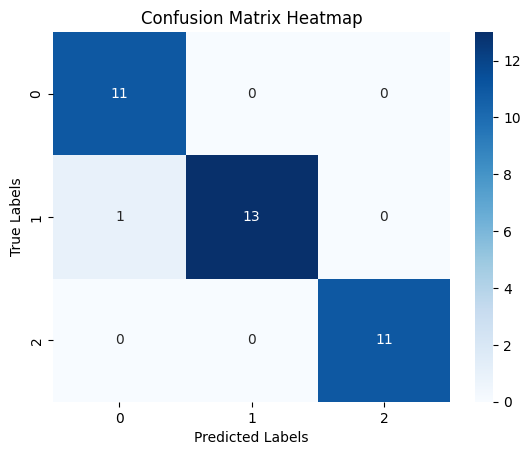

In [19]:
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')